In [1]:
#getting required libraries
!pip install pandas transformers sacrebleu rouge-score datasets

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/25


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.6 MB/s eta 0:00:00
Using cached


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install datasets==2.11.0


Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
    Found existing installation: datasets 1.16.1
    Uninstalling datasets-1.16.1:
      Successfully uninstalled datasets-1.16.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install evaluate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import T5ForConditionalGeneration, BartForConditionalGeneration, T5Tokenizer, BartTokenizer
from sacrebleu import corpus_bleu
from rouge_score import rouge_scorer
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import evaluate  

from transformers import FlaxAutoModelForSeq2SeqLM, AutoTokenizer
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt")

metric_name = "rouge"  
metric = evaluate.load(metric_name)  

# Example predictions and references
predictions = ["The patient is recovering well."]
references = ["The patient is doing well and recovering."]

result = metric.compute(predictions=predictions, references=references)

print(result)


C:\Users\sonal\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'rouge1': np.float64(0.8333333333333333), 'rouge2': np.float64(0.4), 'rougeL': np.float64(0.6666666666666666), 'rougeLsum': np.float64(0.6666666666666666)}


In [8]:
import pandas as pd

file_path = 'ClinicalData.csv'
data= pd.read_csv(file_path)

print("Dataset Description:")
print(data.describe())


Dataset Description:
         Article ID  Abs vs SAbs  Title vs Abs  Title vs SAbs    ROUGE-1  \
count  4.800000e+01    48.000000     48.000000      48.000000  48.000000   
mean   3.773225e+07     0.854504      0.729341       0.790194   0.163082   
std    5.684680e+03     0.060772      0.051085       0.052805   0.043407   
min    3.772345e+07     0.661455      0.552417       0.643820   0.095008   
25%    3.772685e+07     0.836755      0.709365       0.769479   0.136309   
50%    3.773240e+07     0.855002      0.740741       0.798457   0.155514   
75%    3.773761e+07     0.892681      0.758076       0.831664   0.174604   
max    3.774177e+07     0.948974      0.845376       0.872537   0.299242   

         ROUGE-2    ROUGE-L  
count  48.000000  48.000000  
mean    0.182579   0.772542  
std     0.053278   0.103415  
min     0.113111   0.430303  
25%     0.151770   0.735550  
50%     0.169245   0.787441  
75%     0.196112   0.843756  
max     0.335878   0.904192  


In [9]:
data.rename(columns = {'Article ID.1':'Article Name','Article ID.2':'Abstract'}, inplace = True)

In [10]:
# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

In [11]:
import pandas as pd
#Preprocessing the data
train_data = train_data.dropna(subset=['Article ID', 'Abstract', 'Summarized Abstract'])
print(train_data)


    Article ID                                       Article Name  \
6     37739223  Management of postoperative outcomes of polyte...   
39    37726017  A Systematic Review and Meta-analysis of Two N...   
33    37728085  TRPM8 as a Potential Biomarker and Therapeutic...   
13    37736904  Methadone Treatment Gap in Tennessee and How M...   
17    37734884  Psychosocial patient perspectives following ma...   
45    37723918  A systematic review of data elements of comput...   
15    37736067  Incorporating Genetic Testing Into the Care of...   
9     37738791  A systematic scoping review of patient and car...   
16    37735245  The COVID-19 pandemic did not negatively impac...   
29    37730384  Young people's opinions of cancer care in Engl...   
32    37728864  Alzheimer's Disease: Novel Targets and Investi...   
46    37723589  Effectiveness of de-implementation strategies ...   
0     37741773  Does GPT-4 have neurophobia? Localization and ...   
31    37728984  Suicide Risk Asses

In [12]:
#column names
train_data.columns

Index(['Article ID', 'Article Name', 'Abstract', 'Summarized Abstract',
       'Abs vs SAbs', 'Title vs Abs', 'Title vs SAbs', 'ROUGE-1', 'ROUGE-2',
       'ROUGE-L'],
      dtype='object')

In [13]:
#sample size of abstract vs summarized_abstract
sample =train_data.iloc[1]
print(f"""
Atricle (except of 500 characters, total length : {len(sample['Abstract'])}):
""")
print(sample['Abstract'][:500])
print(f"\n Summary (length: {len(sample['Summarized Abstract'])}):")
print(sample['Summarized Abstract'])


Atricle (except of 500 characters, total length : 2039):

This paper aims to evaluate whether there is a device-dependent effect on the 
reduction of surgical site complications in obese patients (body mass index 
[BMI] ≥ 30 kg/m2) undergoing cesarean section (C-section). PubMed, Embase, 
Cochrane Library, and ClinicalTrials.gov were searched for the period, January 
2011 to September 2021. English language articles describing a randomized 
controlled trial (RCT) that compared either a -80 or -125 mm Hg single-use 
negative pressure wound therapy (sNPW

 Summary (length: 523):
This paper aims to evaluate whether there is a device-dependent effect on the                 reduction of surgical site complications in obese patients. The primary outcome of interest was surgical site infection (SSI) Secondary outcomes assessed included seroma, dehiscence, hematoma, bleeding, reoperation, readmission, and (composite) wound complications. A statistically significant improvement in the composit

In [14]:
#TEXT SUMMARIZATION PIPELINES
     
sample_text = train_data['Abstract'][1]
#Collect generated summaries of each model in a dictionary
summaries ={}
     

In [15]:
sample_text

"Radiology reporting is narrative, and its content depends on the clinician's \nability to interpret the images accurately. A tertiary hospital, such as \nanonymous institute, focuses on writing reports narratively as part of training \nfor medical personnel. Nevertheless, free-text reports make it inconvenient to \nextract information for clinical audits and data mining. Therefore, we aim to \nconvert unstructured breast radiology reports into structured formats using \nnatural language processing (NLP) algorithm. This study used 327 de-identified \nbreast radiology reports from the anonymous institute. The radiologist \nidentified the significant data elements to be extracted. Our NLP algorithm \nachieved 97% and 94.9% accuracy in training and testing data, respectively. \nHenceforth, the structured information was used to build the predictive model \nfor predicting the value of the BIRADS category. The model based on random \nforest generated the highest accuracy of 92%. Our study n

In [16]:
# Convert sample_text to a string if it's not already
if not isinstance(sample_text, str):
    sample_text = str(sample_text)

# BASELINE MODEL

In [17]:
def baseline_summary_three_sent(text):
        return "\n". join(sent_tokenize(text)[:3])

In [18]:
import nltk
nltk.download('punkt_tab')
summaries['baseline'] = baseline_summary_three_sent(sample_text)
summaries['baseline']

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


"Radiology reporting is narrative, and its content depends on the clinician's \nability to interpret the images accurately.\nA tertiary hospital, such as \nanonymous institute, focuses on writing reports narratively as part of training \nfor medical personnel.\nNevertheless, free-text reports make it inconvenient to \nextract information for clinical audits and data mining."

# GPT2

In [19]:
from transformers import pipeline, set_seed

set_seed(42)
pipe = pipeline('text-generation',model='gpt2-medium')

gpt2_query = sample_text +'\nTL;DR:\n'
pipe_out = pipe(gpt2_query, max_length =512 ,clean_up_tokenization_spaces =True)


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [20]:
pipe_out

[{'generated_text': "Radiology reporting is narrative, and its content depends on the clinician's \nability to interpret the images accurately. A tertiary hospital, such as \nanonymous institute, focuses on writing reports narratively as part of training \nfor medical personnel. Nevertheless, free-text reports make it inconvenient to \nextract information for clinical audits and data mining. Therefore, we aim to \nconvert unstructured breast radiology reports into structured formats using \nnatural language processing (NLP) algorithm. This study used 327 de-identified \nbreast radiology reports from the anonymous institute. The radiologist \nidentified the significant data elements to be extracted. Our NLP algorithm \nachieved 97% and 94.9% accuracy in training and testing data, respectively. \nHenceforth, the structured information was used to build the predictive model \nfor predicting the value of the BIRADS category. The model based on random \nforest generated the highest accuracy

In [21]:
pipe_out[0]['generated_text']

"Radiology reporting is narrative, and its content depends on the clinician's \nability to interpret the images accurately. A tertiary hospital, such as \nanonymous institute, focuses on writing reports narratively as part of training \nfor medical personnel. Nevertheless, free-text reports make it inconvenient to \nextract information for clinical audits and data mining. Therefore, we aim to \nconvert unstructured breast radiology reports into structured formats using \nnatural language processing (NLP) algorithm. This study used 327 de-identified \nbreast radiology reports from the anonymous institute. The radiologist \nidentified the significant data elements to be extracted. Our NLP algorithm \nachieved 97% and 94.9% accuracy in training and testing data, respectively. \nHenceforth, the structured information was used to build the predictive model \nfor predicting the value of the BIRADS category. The model based on random \nforest generated the highest accuracy of 92%. Our study n

In [22]:
summaries['gpt2'] = '\n'.join(sent_tokenize(pipe_out[0]['generated_text']))

In [23]:
summaries['gpt2']

"Radiology reporting is narrative, and its content depends on the clinician's \nability to interpret the images accurately.\nA tertiary hospital, such as \nanonymous institute, focuses on writing reports narratively as part of training \nfor medical personnel.\nNevertheless, free-text reports make it inconvenient to \nextract information for clinical audits and data mining.\nTherefore, we aim to \nconvert unstructured breast radiology reports into structured formats using \nnatural language processing (NLP) algorithm.\nThis study used 327 de-identified \nbreast radiology reports from the anonymous institute.\nThe radiologist \nidentified the significant data elements to be extracted.\nOur NLP algorithm \nachieved 97% and 94.9% accuracy in training and testing data, respectively.\nHenceforth, the structured information was used to build the predictive model \nfor predicting the value of the BIRADS category.\nThe model based on random \nforest generated the highest accuracy of 92%.\nOur 

# T5

In [24]:
pipe = pipeline('summarization', model = 't5-small' )

pipe_out = pipe(sample_text)

Device set to use cpu


In [25]:
pipe_out

[{'summary_text': 'tertiary hospital, such as anonymous institute, focuses on writing reports narratively as part of training for medical personnel . free-text reports make it inconvenient to extract information for clinical audits and data mining .'}]

In [26]:
summaries['t5'] = 'n'.join(sent_tokenize(pipe_out[0]['summary_text']))

In [27]:
summaries['t5'] 

'tertiary hospital, such as anonymous institute, focuses on writing reports narratively as part of training for medical personnel .nfree-text reports make it inconvenient to extract information for clinical audits and data mining .'

# BART

In [28]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)

Device set to use cpu


In [29]:
pipe_out

[{'summary_text': 'Free-text reports make it inconvenient to extract information for clinical audits and data mining. We aim to convert unstructured breast radiology reports into structured formats using natural language processing (NLP) algorithm. Our NLP algorithm achieved 97% and 94.9% accuracy in training and testing data.'}]

In [30]:
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [31]:
print(summaries["bart"])

Free-text reports make it inconvenient to extract information for clinical audits and data mining.
We aim to convert unstructured breast radiology reports into structured formats using natural language processing (NLP) algorithm.
Our NLP algorithm achieved 97% and 94.9% accuracy in training and testing data.


In [32]:
# Comparing Different Summaries
     
print("GROUND TRUTH")

print(train_data.iloc[1]['Summarized Abstract'])


for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])

GROUND TRUTH
This paper aims to evaluate whether there is a device-dependent effect on the                 reduction of surgical site complications in obese patients. The primary outcome of interest was surgical site infection (SSI) Secondary outcomes assessed included seroma, dehiscence, hematoma, bleeding, reoperation, readmission, and (composite) wound complications. A statistically significant improvement in the composite SSI and superficial SSI outcomes was observed with the -80 mm Hg device, compared with standard dressings.
BASELINE
Radiology reporting is narrative, and its content depends on the clinician's 
ability to interpret the images accurately.
A tertiary hospital, such as 
anonymous institute, focuses on writing reports narratively as part of training 
for medical personnel.
Nevertheless, free-text reports make it inconvenient to 
extract information for clinical audits and data mining.
GPT2
Radiology reporting is narrative, and its content depends on the clinician's 
a

# EVALUATION

ROUGE

In [33]:
import evaluate
rouge_metric = evaluate.load('rouge')

In [34]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = train_data.iloc[1]['Summarized Abstract']

records = []

filtered_summaries = {model_name: summary for model_name, summary in summaries.items() if model_name != "pegasus"}

for model_name in filtered_summaries:
    rouge_metric.add(prediction=filtered_summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    
    # Handle case where score is a simple float (not an object with .mid)
    rouge_dict = {}
    for rn in rouge_names:
        # If score is an object with .mid
        if isinstance(score[rn], dict):  
            rouge_dict[rn] = score[rn].mid.fmeasure
        # If score is a simple float
        else:  
            rouge_dict[rn] = score[rn]
    
    print('rouge_dict ', rouge_dict)
    
    records.append(rouge_dict)

# Create DataFrame from the results
rouge_scores_df = pd.DataFrame.from_records(records, index=filtered_summaries.keys())
print(rouge_scores_df)


rouge_dict  {'rouge1': np.float64(0.14634146341463414), 'rouge2': np.float64(0.016528925619834708), 'rougeL': np.float64(0.0975609756097561), 'rougeLsum': np.float64(0.11382113821138212)}
rouge_dict  {'rouge1': np.float64(0.12811387900355872), 'rouge2': np.float64(0.007168458781362008), 'rougeL': np.float64(0.07829181494661921), 'rougeLsum': np.float64(0.11387900355871887)}
rouge_dict  {'rouge1': np.float64(0.07766990291262137), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.05825242718446602), 'rougeLsum': np.float64(0.05825242718446602)}
rouge_dict  {'rouge1': np.float64(0.06896551724137931), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.06896551724137931), 'rougeLsum': np.float64(0.06896551724137931)}
            rouge1    rouge2    rougeL  rougeLsum
baseline  0.146341  0.016529  0.097561   0.113821
gpt2      0.128114  0.007168  0.078292   0.113879
t5        0.077670  0.000000  0.058252   0.058252
bart      0.068966  0.000000  0.068966   0.068966


In [35]:
#Evaluating on the TEST set of the Dataset
     

def calculate_metric_on_baseline_test_ds(dataset, metric, column_text = 'Abstract', column_summary = 'Summarized Abstract' ):
    """
    This function calculates a specified metric on a baseline test dataset for a Natural Language Processing (NLP) task.
    It assumes the task is a text summarization task, where the goal is to generate a summary (e.g., highlights) from a text (e.g., article).

    Parameters:
    dataset (pandas.DataFrame): The test dataset. It should contain a column for the text and a column for the true summary.
    metric (datasets.Metric): The metric to calculate. This should be a metric object from the Hugging Face datasets library.
    column_text (str, optional): The name of the column in the dataset that contains the text. Defaults to 'article'.
    column_summary (str, optional): The name of the column in the dataset that contains the true summary. Defaults to 'highlights'.

    Returns:
    score (float): The calculated score of the metric on the test dataset.
    """
    summaries = [baseline_summary_three_sent(text) for text in dataset[column_text] ]

    metric.add_batch(predictions = summaries, references = dataset[column_summary] )

    score = metric.compute()
    return score

In [36]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

# Ensure the predictions and references are string-based
reference = str(train_data.iloc[1]['Summarized Abstract'])

# Sample test data (100 rows from the shuffled test data)
test_sampled = test_data.sample(frac=1, random_state=42).head(100)

# Initialize the dictionary to store the ROUGE scores
rouge_dict = {}

for model_name in summaries:
    # Ensure the summary (prediction) is also a string
    prediction = str(summaries[model_name])

    rouge_metric.add(prediction=prediction, reference=reference)

    # Calculate the ROUGE score
    score = rouge_metric.compute()

    # Extract and store the ROUGE scores for each metric
    for rn in rouge_names:
        if isinstance(score[rn], dict) and hasattr(score[rn], 'mid'):
            rouge_dict[rn] = score[rn].mid.fmeasure
        elif isinstance(score[rn], (float, int)):
            rouge_dict[rn] = score[rn]
        else:
            rouge_dict[rn] = None  

# Create DataFrame to display the results
rouge_scores_df = pd.DataFrame.from_dict(rouge_dict, orient='index', columns=['baseline']).T

print(rouge_scores_df)


            rouge1  rouge2    rougeL  rougeLsum
baseline  0.068966     0.0  0.068966   0.068966


# Strategy to calculate the ROUGE Metric on test dataset for the other Models

In [37]:
import pandas as pd

# Preprocessing the test data
test_data = test_data.dropna(subset=['Article ID', 'Abstract', 'Summarized Abstract'])

test_data['Abstract'].iloc[0]


"INTRODUCTION: Aedes mosquitoes are the primary vectors for the spread of viruses \nlike dengue (DENV), zika (ZIKV) and chikungunya (CHIKV), all of which affect \nhumans. Those diseases contribute to global public health issues because of \ntheir great dispersion in rural and urban areas. Mathematical and statistical \nmodels have become helpful in understanding these diseases' epidemiological \ndynamics. However, modelling the complexity of a real phenomenon, such as a \nviral disease, should consider several factors. This scoping review aims to \ndocument, identify and classify the most important factors as well as the \nmodelling strategies for the spread of DENV, ZIKV and CHIKV.\nMETHODS AND ANALYSIS: We will conduct searches in electronic bibliographic \ndatabases such as PubMed, MathSciNet and the Web of Science for full-text \npeer-reviewed articles written in English, French and Spanish. These articles \nshould use mathematical and statistical modelling frameworks to study deng

In [38]:
test_data.columns

Index(['Article ID', 'Article Name', 'Abstract', 'Summarized Abstract',
       'Abs vs SAbs', 'Title vs Abs', 'Title vs SAbs', 'ROUGE-1', 'ROUGE-2',
       'ROUGE-L'],
      dtype='object')

In [39]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements.

    Generator function to yield successive batch-sized chunks from list_of_elements.

    Parameters:
    list_of_elements (list): List of elements to be divided into chunks.
    batch_size (int): The size of each chunk.

    Yields:
    list: Batch-sized chunk from list_of_elements.

    """
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="Abstract",
                               column_summary="Summarized Abstract"):
    """
    Function to calculate a specified metric on a test dataset for a Natural Language Processing (NLP) task.
    It assumes the task is a text summarization task, where the goal is to generate a summary from a text.

    Parameters:
    dataset (pandas.DataFrame): The test dataset. It should contain a column for the text and a column for the true summary.
    metric (datasets.Metric): The metric to calculate. This should be a metric object from the Hugging Face datasets library.
    model (transformers.PreTrainedModel): The transformer model to use for text generation.
    tokenizer (transformers.PreTrainedTokenizer): The tokenizer corresponding to the model.
    batch_size (int, optional): The size of the batches to use for processing. Defaults to 16.
    device (str, optional): The device to run the model on. Defaults to the output of torch.cuda.is_available().
    column_text (str, optional): The name of the column in the dataset that contains the text. Defaults to 'article'.
    column_summary (str, optional): The name of the column in the dataset that contains the true summary. Defaults to 'highlights'.

    Returns:
    score (float): The calculated score of the metric on the test dataset.
    """
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):
        inputs = tokenizer([article_batch], max_length=1024, truncation=True, padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score
     

In [40]:
test = test_data['Abstract'].iloc(0)

if not isinstance(test, str):
   test = str(test)

In [42]:
# Import the necessary libraries
from rouge_score import rouge_scorer

# Create a ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)

# Initialize lists to store ROUGE scores for each model on training and test data
train_rouge_scores = {'Model': [], 'ROUGE1': [], 'ROUGE2': [], 'ROUGEL': [], 'ROUGELSUM': []}
test_rouge_scores = {'Model': [], 'ROUGE1': [], 'ROUGE2': [], 'ROUGEL': [], 'ROUGELSUM': []}

# Filter out the 'pegasus' model from the summaries dictionary
summaries_filtered = {key: value for key, value in summaries.items() if key != 'pegasus'}

# Iterate over the training and test data, and evaluate ROUGE scores for each model
for data, rouge_scores in [(train_data, train_rouge_scores), (test_data, test_rouge_scores)]:
    for model_name, generated_summary in summaries_filtered.items():
        for index, row in data.iterrows():
            reference_summary = row['Summarized Abstract']
            scores = scorer.score(reference_summary, generated_summary)
            rouge_scores['Model'].append(model_name)
            rouge_scores['ROUGE1'].append(scores['rouge1'].fmeasure)
            rouge_scores['ROUGE2'].append(scores['rouge2'].fmeasure)
            rouge_scores['ROUGEL'].append(scores['rougeL'].fmeasure)
            rouge_scores['ROUGELSUM'].append(scores['rougeLsum'].fmeasure)

# Create DataFrames to store the ROUGE scores
train_rouge_df = pd.DataFrame(train_rouge_scores)
test_rouge_df = pd.DataFrame(test_rouge_scores)

# Display the ROUGE scores for training and test data
print("ROUGE Scores for Training Data:")
print(train_rouge_df.pivot_table(index='Model', values=['ROUGE1', 'ROUGE2', 'ROUGEL', 'ROUGELSUM'], aggfunc='mean'))

print("\nROUGE Scores for Test Data:")
print(test_rouge_df.pivot_table(index='Model', values=['ROUGE1', 'ROUGE2', 'ROUGEL', 'ROUGELSUM'], aggfunc='mean'))


ROUGE Scores for Training Data:
            ROUGE1    ROUGE2    ROUGEL  ROUGELSUM
Model                                            
bart      0.133884  0.020034  0.094861   0.103854
baseline  0.169808  0.015507  0.109960   0.140683
gpt2      0.188822  0.027980  0.115463   0.147607
t5        0.104898  0.007337  0.073531   0.073531

ROUGE Scores for Test Data:
            ROUGE1    ROUGE2    ROUGEL  ROUGELSUM
Model                                            
bart      0.133109  0.013735  0.092602   0.099444
baseline  0.161564  0.005377  0.104981   0.138405
gpt2      0.182928  0.016783  0.099760   0.146776
t5        0.110360  0.003163  0.076519   0.076519


In [43]:
# Define a function to print the actual and generated summaries for each model
def print_actual_vs_generated_summaries(model_name, actual_summary, generated_summary):
    print(f"{model_name.upper()} - Actual Summary:")
    print(actual_summary)
    print(f"{model_name.upper()} - Generated Summary:")
    print(generated_summary)
    print("\n")

summaries_filtered = {key: value for key, value in summaries.items() if key != 'pegasus'}

# Iterate through the filtered models and print the actual vs generated summaries without truncation
for model_name in summaries_filtered:
    actual_summary = train_data.iloc[1]['Summarized Abstract']
    generated_summary = summaries_filtered[model_name]
    print_actual_vs_generated_summaries(model_name, actual_summary, generated_summary)


BASELINE - Actual Summary:
This paper aims to evaluate whether there is a device-dependent effect on the                 reduction of surgical site complications in obese patients. The primary outcome of interest was surgical site infection (SSI) Secondary outcomes assessed included seroma, dehiscence, hematoma, bleeding, reoperation, readmission, and (composite) wound complications. A statistically significant improvement in the composite SSI and superficial SSI outcomes was observed with the -80 mm Hg device, compared with standard dressings.
BASELINE - Generated Summary:
Radiology reporting is narrative, and its content depends on the clinician's 
ability to interpret the images accurately.
A tertiary hospital, such as 
anonymous institute, focuses on writing reports narratively as part of training 
for medical personnel.
Nevertheless, free-text reports make it inconvenient to 
extract information for clinical audits and data mining.


GPT2 - Actual Summary:
This paper aims to evalu

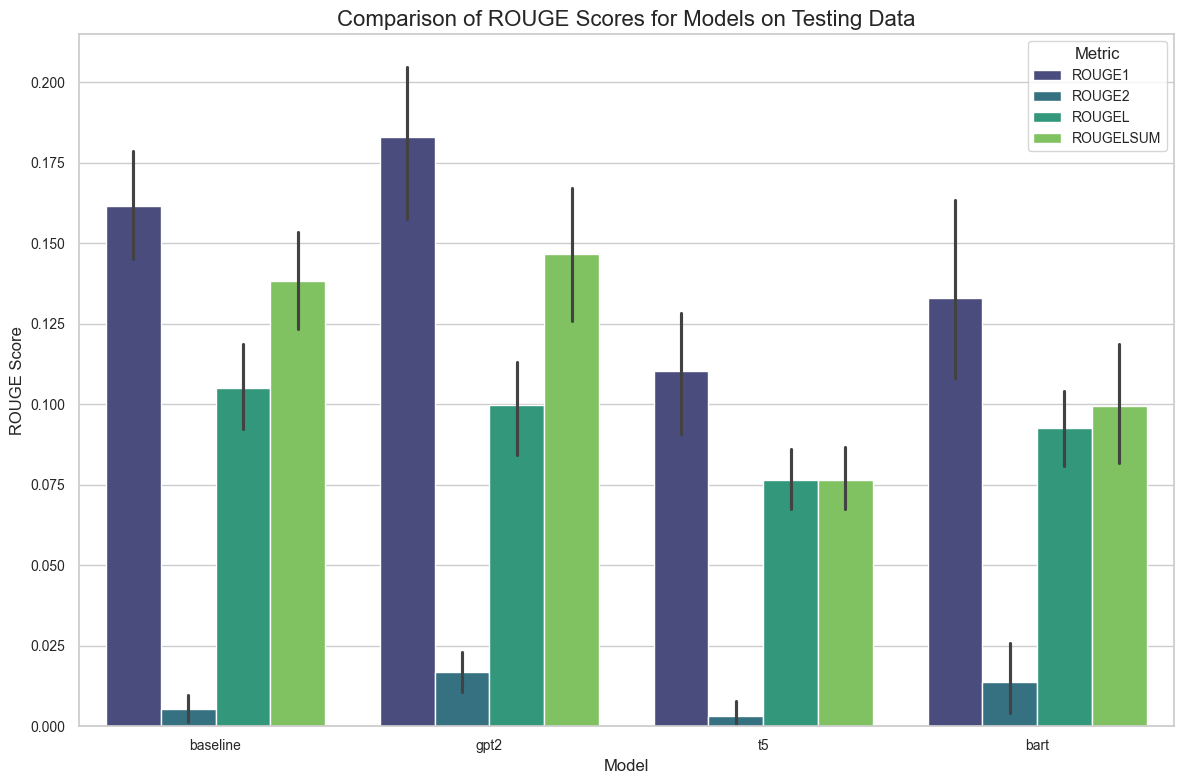

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column to distinguish between training and testing data
train_rouge_df['Dataset'] = 'Training'
test_rouge_df['Dataset'] = 'Testing'

# Combine the training and testing DataFrames
combined_rouge_df = pd.concat([train_rouge_df, test_rouge_df])

# Melt the DataFrame for easier plotting with Seaborn
melted_rouge_df = combined_rouge_df.melt(
    id_vars=['Model', 'Dataset'], 
    var_name='Metric', 
    value_name='Score'
)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Model', 
    y='Score', 
    hue='Metric', 
    data=melted_rouge_df[melted_rouge_df['Dataset'] == 'Testing'],  # Filter for Testing dataset
    palette='viridis'
)

# Add labels and title
plt.title('Comparison of ROUGE Scores for Models on Testing Data', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('ROUGE Score', fontsize=12)
plt.legend(title='Metric', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

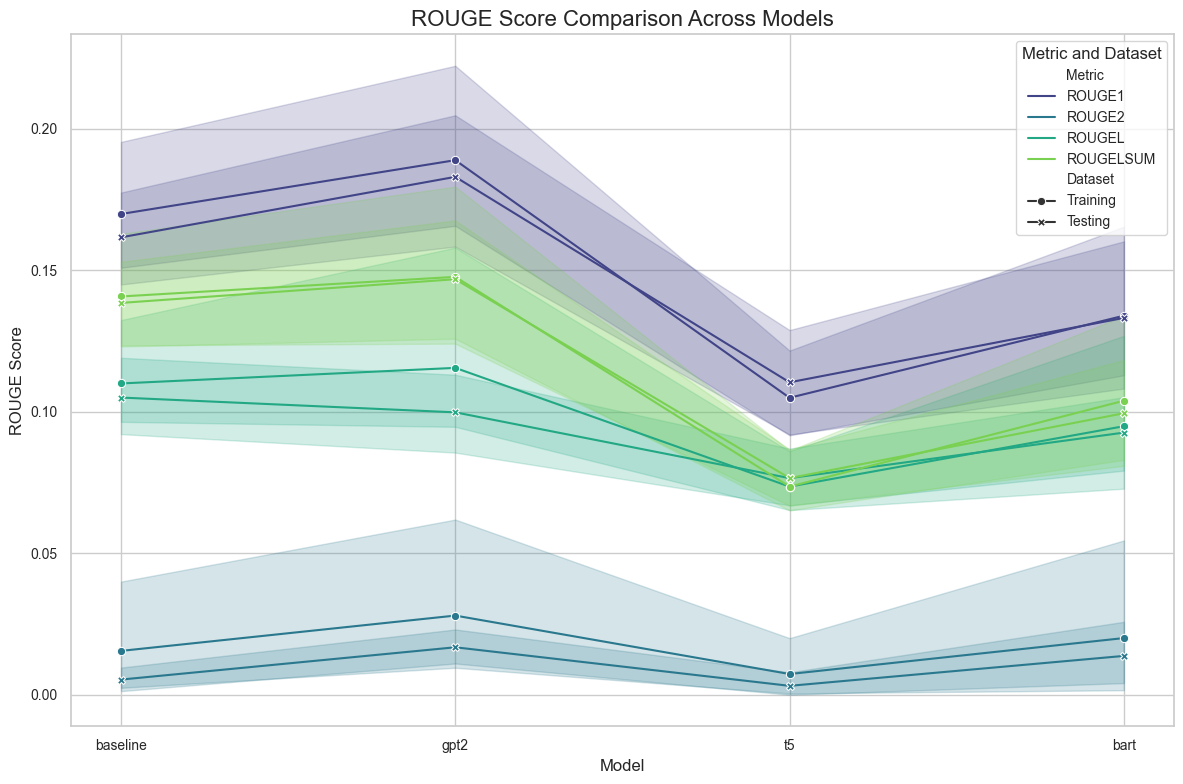

In [46]:
# Line plot for ROUGE scores
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=melted_rouge_df, 
    x='Model', 
    y='Score', 
    hue='Metric', 
    style='Dataset', 
    markers=True, 
    dashes=False, 
    palette='viridis'
)

# Add labels and title
plt.title('ROUGE Score Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('ROUGE Score', fontsize=12)
plt.legend(title='Metric and Dataset', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

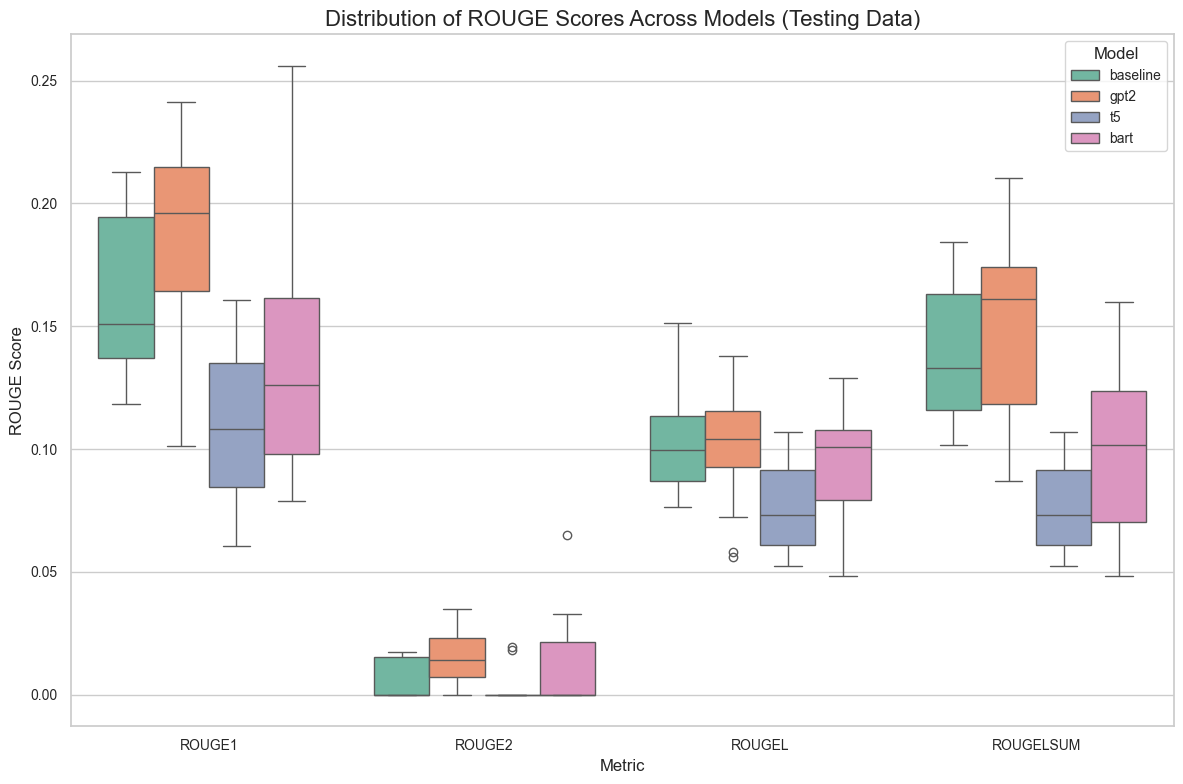

In [49]:
# Box plot for ROUGE scores
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Metric', 
    y='Score', 
    hue='Model', 
    data=melted_rouge_df[melted_rouge_df['Dataset'] == 'Testing'], 
    palette='Set2'
)

# Add labels and title
plt.title('Distribution of ROUGE Scores Across Models (Testing Data)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('ROUGE Score', fontsize=12)
plt.legend(title='Model', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

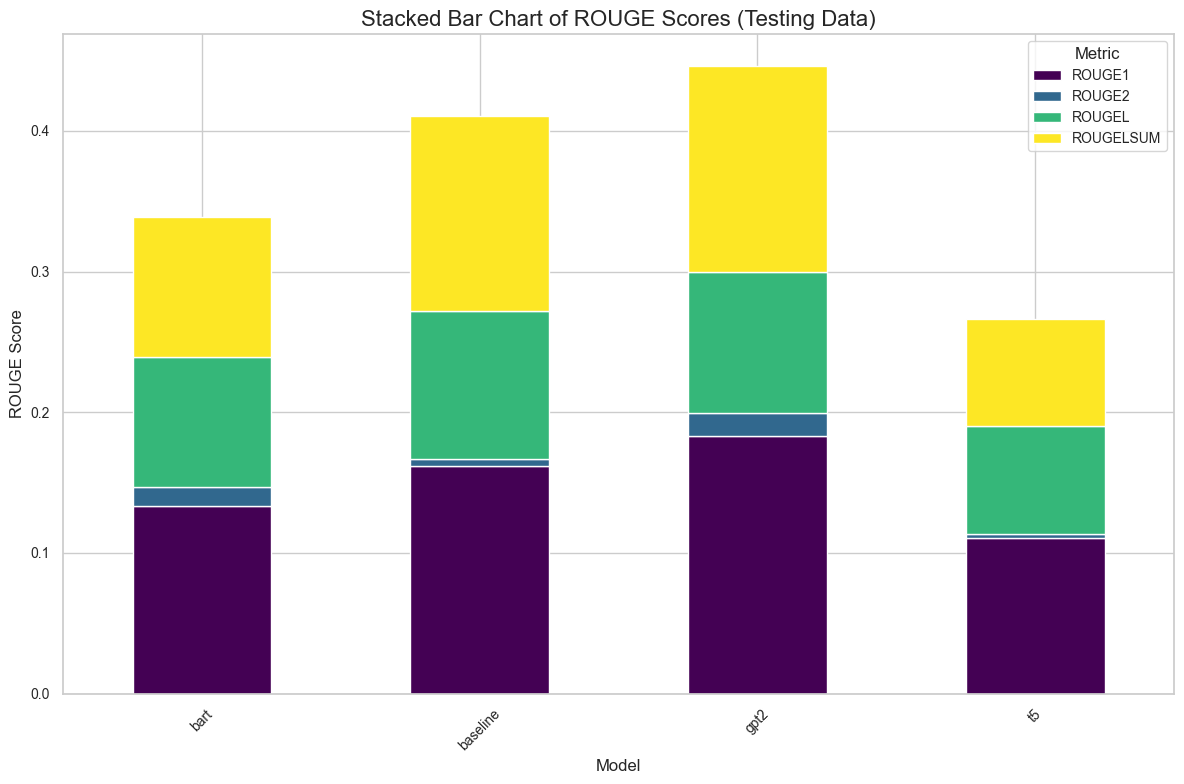

In [50]:
# Prepare data for stacked bar chart
stacked_data = combined_rouge_df[combined_rouge_df['Dataset'] == 'Testing'].pivot_table(
    index='Model', 
    values=['ROUGE1', 'ROUGE2', 'ROUGEL', 'ROUGELSUM'], 
    aggfunc='mean'
)

# Plot the stacked bar chart
stacked_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    colormap='viridis'
)

# Add labels and title
plt.title('Stacked Bar Chart of ROUGE Scores (Testing Data)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('ROUGE Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metric', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

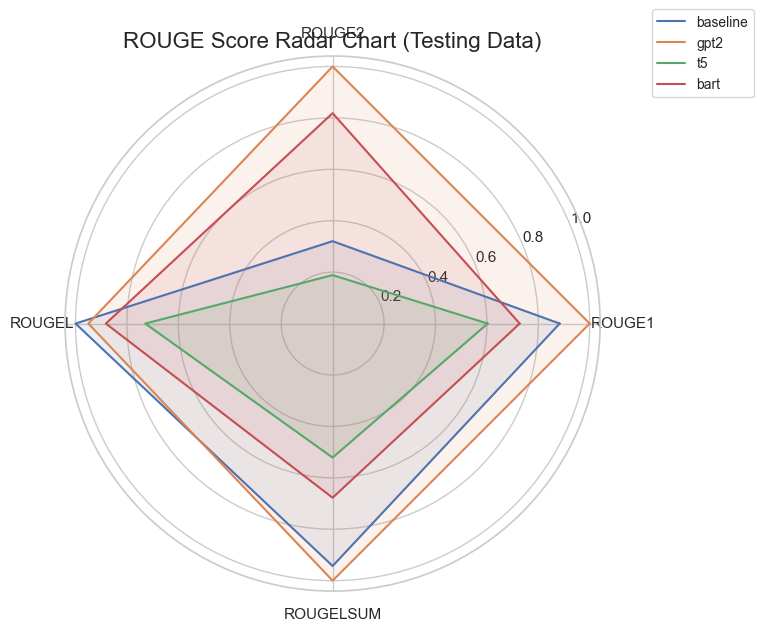

In [51]:
from math import pi

# Prepare data for radar chart (Spider chart)
models = combined_rouge_df['Model'].unique()
metrics = ['ROUGE1', 'ROUGE2', 'ROUGEL', 'ROUGELSUM']
radar_data = combined_rouge_df[combined_rouge_df['Dataset'] == 'Testing'].pivot_table(
    index='Model', 
    values=metrics, 
    aggfunc='mean'
)

# Normalize the data for better visualization
radar_data = radar_data / radar_data.max()

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1] 

# Plot each model
for model in models:
    values = radar_data.loc[model].tolist()
    values += values[:1]  
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title('ROUGE Score Radar Chart (Testing Data)', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()